In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ipl_data.csv to ipl_data.csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['ipl_data.csv']))

In [ ]:
#Dropping certain features
df = df.drop(['mid','date','batsman','bowler', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker', 'non-striker'], axis =1)

In [ ]:
X = df.drop(['total'], axis =1)
y = df['total']

In [ ]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

venue_encode = LabelEncoder()
batting_team_encode = LabelEncoder()
bowling_team_encode = LabelEncoder()

X['venue'] = venue_encode.fit_transform(X['venue'])
X['bat_team'] = batting_team_encode.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encode.fit_transform(X['bowl_team'])



In [ ]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# standarization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define NN
model = keras.Sequential([
	keras.layers.Input( shape=(X_train_scaled.shape[1],)), # Input layer
	keras.layers.Dense(512, activation='relu'), # Hidden layer with 512 units and ReLU activation
	keras.layers.Dense(216, activation='relu'), # Hidden layer with 216 units and ReLU activation
	keras.layers.Dense(1, activation='linear') # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0) # delta can chnaged if required
model.compile(optimizer='adam', loss=huber_loss) # for regression huber_loss is used


In [ ]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 [==============================] - 6s 7ms/step - loss: 33.9381 - val_loss: 22.4843
Epoch 2/50
832/832 [==============================] - 4s 5ms/step - loss: 22.3618 - val_loss: 22.4748
Epoch 3/50
832/832 [==============================] - 4s 5ms/step - loss: 22.3231 - val_loss: 22.0843
Epoch 4/50
832/832 [==============================] - 5s 6ms/step - loss: 22.2556 - val_loss: 22.6547
Epoch 5/50
832/832 [==============================] - 4s 4ms/step - loss: 22.2380 - val_loss: 21.8952
Epoch 6/50
832/832 [==============================] - 4s 5ms/step - loss: 22.1746 - val_loss: 22.0786
Epoch 7/50
832/832 [==============================] - 5s 6ms/step - loss: 22.1898 - val_loss: 21.8577
Epoch 8/50
832/832 [==============================] - 4s 5ms/step - loss: 22.1519 - val_loss: 22.1370
Epoch 9/50
832/832 [==============================] - 5s 6ms/step - loss: 22.1500 - val_loss: 22.0824
Epoch 10/50
832/832 [==============================] - 4s 5ms/step - loss: 22.1485

<Axes: >

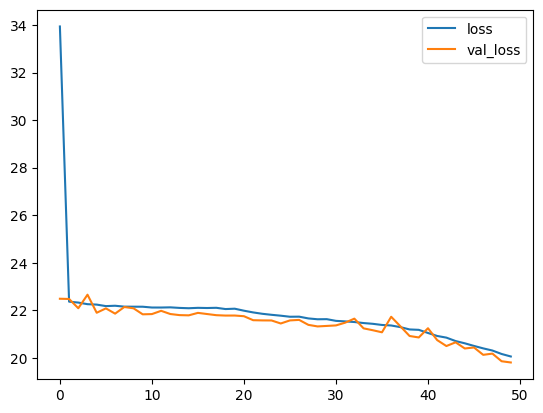

In [ ]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


In [ ]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)


713/713 [==============================] - 4s 5ms/step


20.298436056754745

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Bowling Team:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
	with output:
		clear_output() # Clear the previous output


		# Decode the encoded values back to their original values
		decoded_venue = venue_encode.transform([venue.value])
		decoded_batting_team = batting_team_encode.transform([batting_team.value])
		decoded_bowling_team = bowling_team_encode.transform([bowling_team.value])


		input = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team])
		input = input.reshape(1,3)
		input = scaler.transform(input)
		#print(input)
		predicted_score = model.predict(input)
		predicted_score = int(predicted_score[0,0])

		print(predicted_score)


In [ ]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, predict_button, output)


Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Bowling Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Button(description='Predict Score', style=ButtonStyle())

Output()